In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.append('..')
from MPRA_exp.utils import *

import os
os.chdir('../../data/GosaiMPRA')

In [3]:
# df = pd.read_csv('supp_materials/SupTable 10 - CODA_paper_library.txt', delimiter='\t')
df = pd.read_csv('supp_materials/SupTable 2 - UKBB_GTEX_CODA_averaged_no_cutoffs.txt', delimiter='\t', low_memory=False)
df

/tmp/ipykernel_524408/1624709052.py:2: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('supp_materials/SupTable 2 - UKBB_GTEX_CODA_averaged_no_cutoffs.txt', delimiter='\t')


,HepG2_mean,IDs,K562_mean,OL,SKNSH_mean,chr,class,ctrl_mean_hepg2,ctrl_mean_k562,ctrl_mean_sknsh,...,lfcSE_hepg2,lfcSE_k562,lfcSE_sknsh,nt_sequence,padj_hepg2,padj_k562,padj_sknsh,pvalue_hepg2,pvalue_k562,pvalue_sknsh
0,0.233601,7:70038969:G:T:A:wC,0.060779,29,0.047194,7,"BMI,BFP",1108.444552,1108.444552,1108.444552,...,0.118254,0.098795,0.130671,CCTGGTCTTTCTTGCTAAATAAACATATCGTGCATCATCCAGATCT...,9.691479e-02,6.338905e-01,8.273912e-01,4.822018e-02,5.384208e-01,7.179756e-01
1,0.004565,1:192696196:C:T:A:wC,0.379639,33,-0.244395,1,Depression_GP,395.510507,395.510507,395.510507,...,0.186394,0.162169,0.118952,CATAAAGATGAGGCTTGGCAAAGAACATCTCTCGGTGCCTCCCATT...,9.883817e-01,3.730610e-02,6.095871e-02,9.804590e-01,1.923156e-02,3.992017e-02
2,0.384537,1:211209457:C:T:A:wC,0.036707,33,-0.004578,1,CAD,943.663365,943.663365,943.663365,...,0.121640,0.098391,0.087458,CATAAAGCCAATCACTGAGATGACAAGTACTGCCAGGAAAGAAGGC...,5.069204e-03,7.842750e-01,9.681826e-01,1.570769e-03,7.090912e-01,9.582568e-01
3,4.106624,15:89574440:GT:G:A:wC,4.465352,33,2.869749,15,CAD,64.051812,64.051812,64.051812,...,0.140392,0.113868,0.163372,CATAAAGGCAGTGTAGACCCAAACAGTGAGCAGTAGCAAGATTTAT...,2.345249e-186,0.000000e+00,6.289672e-68,4.356875e-188,0.000000e+00,4.508310e-69
4,4.116494,15:89574440:GT:G:R:wC,4.508784,33,3.040183,15,CAD,27.731069,27.731069,27.731069,...,0.209049,0.157035,0.195014,CATAAAGGCAGTGTAGACCCAAACAGTGAGCAGTAGCAAGATTTAT...,6.007565e-85,5.394421e-180,9.960333e-54,2.547286e-86,2.711361e-181,8.571694e-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798059,5.344297,4:44680358:NA:NA,7.443810,NaN,6.585129,4,K27_All,104.819189,104.819189,104.819189,...,0.069708,0.097905,0.140760,CAGTAGTAAGAAAGAGACAATGCAAAGGAATTGGCACAGCACTCAG...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
798060,-0.156933,18:9125893:NA:NA,-0.204913,NaN,-0.209358,18,K27_Uniq,357.698964,357.698964,357.698964,...,0.157279,0.133052,0.185115,CAGTACTGCTGGCCCCAGAAAAGCCCCTCTCCTTATACCCTAGGCC...,4.571589e-01,1.937698e-01,3.944976e-01,3.183785e-01,1.235367e-01,2.580720e-01
798061,0.613623,12:33905808:NA:NA,1.218233,NaN,0.569894,12,K27_Uniq,190.366397,190.366397,190.366397,...,0.167222,0.127132,0.190639,CAGTACCTTGTCCCCACTTCCCATTTGGCCTCTGGCAGAGGAGGAG...,8.953223e-04,4.913016e-21,9.337706e-03,2.430100e-04,9.480389e-22,2.795408e-03
798062,-0.338764,3:128145854:NA:NA,-0.222234,NaN,-0.817852,3,K27_Uniq,255.909656,255.909656,255.909656,...,0.198187,0.159002,0.238637,CAGTACACCCCAGCTTCCAAAGGCCTTCTGTGACAAAGAGAGACTA...,1.680154e-01,2.429197e-01,2.367398e-03,8.739221e-02,1.622097e-01,6.098790e-04


In [3]:
print(df.columns)

Index(['HepG2_mean', 'IDs', 'K562_mean', 'OL', 'SKNSH_mean', 'chr', 'class',
       'ctrl_mean_hepg2', 'ctrl_mean_k562', 'ctrl_mean_sknsh', 'data_project',
       'exp_mean_hepg2', 'exp_mean_k562', 'exp_mean_sknsh', 'lfcSE_hepg2',
       'lfcSE_k562', 'lfcSE_sknsh', 'nt_sequence', 'padj_hepg2', 'padj_k562',
       'padj_sknsh', 'pvalue_hepg2', 'pvalue_k562', 'pvalue_sknsh'],
      dtype='object')


In [17]:
x = df['HepG2_mean']
x

0         0.233601
1         0.004565
2         0.384537
3         4.106624
4         4.116494
            ...   
798059    5.344297
798060   -0.156933
798061    0.613623
798062   -0.338764
798063    0.099737
Name: HepG2_mean, Length: 798064, dtype: float64

In [29]:
x[547628]

1.92688309385236

In [15]:
y = np.log2(df['exp_mean_hepg2'] / df['ctrl_mean_hepg2'])
y

0         0.232102
1         0.001116
2         0.382236
3         4.097738
4         4.122810
            ...   
798059    5.342573
798060   -0.157005
798061    0.613855
798062   -0.338600
798063    0.099620
Length: 798064, dtype: float64

In [30]:
df.iloc[[567428]]

,HepG2_mean,IDs,K562_mean,OL,SKNSH_mean,chr,class,ctrl_mean_hepg2,ctrl_mean_k562,ctrl_mean_sknsh,...,lfcSE_hepg2,lfcSE_k562,lfcSE_sknsh,nt_sequence,padj_hepg2,padj_k562,padj_sknsh,pvalue_hepg2,pvalue_k562,pvalue_sknsh
567428,0.416159,1:14677:G:A:A:wC,0.515428,41,0.418602,1,GTEx,174.132103,135.999762,144.507546,...,0.189835,0.505393,0.312735,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,0.045837,0.518003,0.27281,0.028364,0.307797,0.180728


In [31]:
x[567428]

0.416158883651806

In [32]:
y[567428]

0.4176171520906892

<Axes: xlabel='HepG2_mean'>

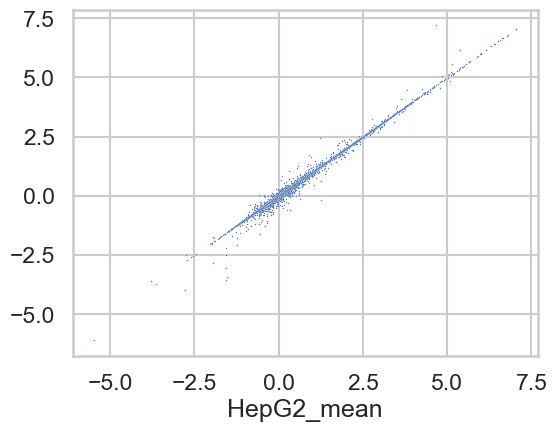

In [18]:
sns.scatterplot(x=x[:10000], y=y[:100000], s=1)

In [5]:
# count = [0,0,0]
# indice_list = []
# for index, row in df.iterrows():
#     try:
#         int(row['OL'])
#     except:
#         count[0] += 1
#         # print(row['OL'])
#         if (row['OL'] is np.nan):
#             count[1] += 1
#     if len(row['nt_sequence']) != 200:
#         count[2] += 1
# print(count)

In [6]:
df = df[df['nt_sequence'].str.len() == 200]
df['chr'] = 'chr' + df['chr'].astype(str)
len(df)

/tmp/ipykernel_77256/1847383792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chr'] = 'chr' + df['chr'].astype(str)


763683

In [7]:
df

,HepG2_mean,IDs,K562_mean,OL,SKNSH_mean,chr,class,ctrl_mean_hepg2,ctrl_mean_k562,ctrl_mean_sknsh,...,lfcSE_hepg2,lfcSE_k562,lfcSE_sknsh,nt_sequence,padj_hepg2,padj_k562,padj_sknsh,pvalue_hepg2,pvalue_k562,pvalue_sknsh
0,0.233601,7:70038969:G:T:A:wC,0.060779,29,0.047194,chr7,"BMI,BFP",1108.444552,1108.444552,1108.444552,...,0.118254,0.098795,0.130671,CCTGGTCTTTCTTGCTAAATAAACATATCGTGCATCATCCAGATCT...,9.691479e-02,6.338905e-01,8.273912e-01,4.822018e-02,5.384208e-01,7.179756e-01
1,0.004565,1:192696196:C:T:A:wC,0.379639,33,-0.244395,chr1,Depression_GP,395.510507,395.510507,395.510507,...,0.186394,0.162169,0.118952,CATAAAGATGAGGCTTGGCAAAGAACATCTCTCGGTGCCTCCCATT...,9.883817e-01,3.730610e-02,6.095871e-02,9.804590e-01,1.923156e-02,3.992017e-02
2,0.384537,1:211209457:C:T:A:wC,0.036707,33,-0.004578,chr1,CAD,943.663365,943.663365,943.663365,...,0.121640,0.098391,0.087458,CATAAAGCCAATCACTGAGATGACAAGTACTGCCAGGAAAGAAGGC...,5.069204e-03,7.842750e-01,9.681826e-01,1.570769e-03,7.090912e-01,9.582568e-01
4,4.116494,15:89574440:GT:G:R:wC,4.508784,33,3.040183,chr15,CAD,27.731069,27.731069,27.731069,...,0.209049,0.157035,0.195014,CATAAAGGCAGTGTAGACCCAAACAGTGAGCAGTAGCAAGATTTAT...,6.007565e-85,5.394421e-180,9.960333e-54,2.547286e-86,2.711361e-181,8.571694e-55
5,1.423444,12:63513920:G:A:A:wC,1.616602,32,1.335892,chr12,Morning_Person,355.529885,355.529885,355.529885,...,0.148307,0.159670,0.224775,CATAAAGGGCTGAACATGCTGTTGAAAAAATGTAGATATAAAAGTT...,8.061592e-21,3.786048e-23,1.998487e-08,8.155314e-22,4.294578e-24,2.794548e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798059,5.344297,4:44680358:NA:NA,7.443810,NaN,6.585129,chr4,K27_All,104.819189,104.819189,104.819189,...,0.069708,0.097905,0.140760,CAGTAGTAAGAAAGAGACAATGCAAAGGAATTGGCACAGCACTCAG...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
798060,-0.156933,18:9125893:NA:NA,-0.204913,NaN,-0.209358,chr18,K27_Uniq,357.698964,357.698964,357.698964,...,0.157279,0.133052,0.185115,CAGTACTGCTGGCCCCAGAAAAGCCCCTCTCCTTATACCCTAGGCC...,4.571589e-01,1.937698e-01,3.944976e-01,3.183785e-01,1.235367e-01,2.580720e-01
798061,0.613623,12:33905808:NA:NA,1.218233,NaN,0.569894,chr12,K27_Uniq,190.366397,190.366397,190.366397,...,0.167222,0.127132,0.190639,CAGTACCTTGTCCCCACTTCCCATTTGGCCTCTGGCAGAGGAGGAG...,8.953223e-04,4.913016e-21,9.337706e-03,2.430100e-04,9.480389e-22,2.795408e-03
798062,-0.338764,3:128145854:NA:NA,-0.222234,NaN,-0.817852,chr3,K27_Uniq,255.909656,255.909656,255.909656,...,0.198187,0.159002,0.238637,CAGTACACCCCAGCTTCCAAAGGCCTTCTGTGACAAAGAGAGACTA...,1.680154e-01,2.429197e-01,2.367398e-03,8.739221e-02,1.622097e-01,6.098790e-04


In [8]:
df = df[['nt_sequence', 'chr', 'HepG2_mean', 'K562_mean', 'SKNSH_mean']]
df.columns = ['seq', 'chr', 'HepG2', 'K562', 'SKNSH']
df.to_csv('GosaiMPRA_len200.csv', index=False)